<a href="https://colab.research.google.com/github/ParasNandwani/EDA_PROJECT/blob/master/CoronaVirusIndia%20/Tracking_CoronaVirus_Spread_in_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pycountry

     |████████████████████████████████| 10.0MB 2.5MB/s 
  Created wheel for pycountry: filename=pycountry-19.8.18-py2.py3-none-any.whl size=10627361 sha256=6d63cf3319c3d62b18915fa950fd9c00638d31e48f4076d71ae5b90131084bf4
  Stored in directory: /root/.cache/pip/wheels/a2/98/bf/f0fa1c6bf8cf2cbdb750d583f84be51c2cd8272460b8b36bd3
Successfully built pycountry


In [8]:
!pip install pywaffle

     |████████████████████████████████| 532kB 2.8MB/s 


In [85]:
#import necessasry library
import numpy as np
import pandas as pd 
import os

#import baskic ploting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import pycountry

# importing plotly libraries
import plotly.express as px
from plotly.offline import init_notebook_mode,iplot
import plotly.graph_objects as go
import plotly.offline as py
from plotly.offline import download_plotlyjs,init_notebook_mode,iplot

from pywaffle import Waffle
py.init_notebook_mode(connected=True)
import folium
from folium import plugins


plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize']=8,5


import warnings
warnings.filterwarnings('ignore')

In [29]:
df=pd.read_csv('https://raw.githubusercontent.com/ParasNandwani/EDA_PROJECT/master/CoronaVirusIndia/Covid%20cases%20in%20India.csv')
df.head()

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured/Discharged/Migrated,Deaths
0,1.0,Andhra Pradesh,3,0,0,0
1,2.0,Chattisgarh,1,0,0,0
2,3.0,Delhi,16,1,5,1
3,NaN,Gujarat,5,0,0,0
4,4.0,Haryana,3,14,0,0


In [31]:
df.columns

Index(['S. No.', 'Name of State / UT',
       'Total Confirmed cases (Indian National)',
       'Total Confirmed cases ( Foreign National )',
       'Cured/Discharged/Migrated', 'Deaths'],
      dtype='object')

In [0]:
df.drop(['S. No.'],axis=1,inplace=True)

In [0]:
df['TotalCases']=df['Total Confirmed cases (Indian National)']+df['Total Confirmed cases ( Foreign National )']

In [34]:
df.head(5)

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured/Discharged/Migrated,Deaths,TotalCases
0,Andhra Pradesh,3,0,0,0,3
1,Chattisgarh,1,0,0,0,1
2,Delhi,16,1,5,1,17
3,Gujarat,5,0,0,0,5
4,Haryana,3,14,0,0,17


In [0]:
df['ActiveCases']=df['TotalCases']-(df['Cured/Discharged/Migrated']+df['Deaths'])

In [45]:
print(f'Total no. of confirmed cases in India',df['TotalCases'].sum())
print(f'Total no. of Active cases in India',df['ActiveCases'].sum())
print(f'Total No Of Cured Cases in India',df['Cured/Discharged/Migrated'].sum())
print(f'Total No Of Deaths in India',df['Deaths'].sum())
print(f'Total No Of States Affected in India', len(df['Name of State / UT']))

Total no. of confirmed cases in India 223
Total no. of Active cases in India 196
Total No Of Cured Cases in India 23
Total No Of Deaths in India 4
Total No Of States Affected in India 20


In [49]:
def highlightMax(s):
  is_max=s==s.max()
  return ['background-color:pink' if v else '' for v in is_max]

df.style.apply(highlightMax,subset=['Cured/Discharged/Migrated','Deaths','TotalCases','ActiveCases'])

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured/Discharged/Migrated,Deaths,TotalCases,ActiveCases
0,Andhra Pradesh,3,0,0,0,3,3
1,Chattisgarh,1,0,0,0,1,1
2,Delhi,16,1,5,1,17,11
3,Gujarat,5,0,0,0,5,5
4,Haryana,3,14,0,0,17,17
5,Karnataka,15,0,1,1,15,13
6,Kerala,26,2,3,0,28,25
7,Maharashtra,49,3,0,1,52,51
8,Odisha,2,0,0,0,2,2
9,Pondicherry,1,0,0,0,1,1


In [83]:
colors = ['#1f77b4', '#17becf']

indian = df['Total Confirmed cases (Indian National)'].sum()
foreign = df['Total Confirmed cases ( Foreign National )'].sum()

fig=go.Figure(data=[go.Pie(labels=['Indian','Foreign'],values=[indian,foreign],hole=0.3)])

# fig.update_traces(hoverinfo='label+percent',  textinfo='value',textfont_size=20,marker=dict(colors=colors,line=dict(color='#FFFFFF',width=2)))

fig.show(renderer="colab")

# States Wise Data

In [77]:
x=df.groupby('Name of State / UT')['ActiveCases'].sum().sort_values(ascending=False).to_frame()
x.style.background_gradient(cmap='Reds')

,ActiveCases
Name of State / UT,
Maharashtra,51
Kerala,25
Haryana,17
Telengana,16
Uttar Pradesh,14
Rajasthan,14
Karnataka,13
Delhi,11
Union Territory of Ladakh,10


#Total Active Cases

In [88]:
fig=px.bar(df.sort_values('ActiveCases',ascending=False),
           x='ActiveCases',y='Name of State / UT',
           text='ActiveCases',orientation='h',
           width=1000,height=700,range_x=[0,max(df['ActiveCases'])])
fig.update_traces(marker_color='#46cdcf',opacity=0.8)



fig.show(renderer="colab")

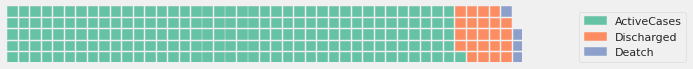

In [97]:
df_condensed=pd.DataFrame([df['ActiveCases'].sum(),df['Cured/Discharged/Migrated'].sum(),df['Deaths'].sum()],columns=['Cases'])
df_condensed.index=['ActiveCases','Discharged','Deatch']
df_condensed


fig=plt.figure(
      FigureClass=Waffle,
      rows=5,
      values=df_condensed['Cases'],
      labels=list(df_condensed.index),
      figsize=(10,3),
      legend={'loc':'upper left','bbox_to_anchor':(1.1,1)}
    )

# National V/S Foreign Cases

In [103]:
from plotly.subplots import make_subplots
fig=make_subplots(
      rows=1,cols=2,
      subplot_titles=('National Cases','Foreign Cases'))

temp=df.sort_values('Total Confirmed cases (Indian National)',ascending=False).sort_values('Total Confirmed cases (Indian National)',ascending=False)

fig.add_trace(go.Bar(y=temp['Total Confirmed cases (Indian National)'],x=temp['Name of State / UT']),1,1)

temp1=df.sort_values('Total Confirmed cases ( Foreign National )',ascending=False).sort_values('Total Confirmed cases ( Foreign National )',ascending=False)

fig.add_trace(go.Bar(y=temp1['Total Confirmed cases ( Foreign National )'],x=temp1['Name of State / UT']),1,2)

fig.show(renderer='colab')

In [113]:
India_coord = pd.read_excel('https://github.com/ParasNandwani/EDA_PROJECT/blob/master/CoronaVirusIndia/Indian%20Coordinates.xlsx?raw=True',encoding='utf-8')
India_coord.head(5)

,Name of State / UT,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973


# Visualising the Spread Geographically

In [112]:
df_full=pd.merge(India_coord,df,on='Name of State / UT')
df_full.head()

map=folium.Map(loaction=[20,80],zoom_start=3.5,titles='Stamen Toner')
map

TypeError: ignored